In [1]:
import re
from datetime import timedelta
from pathlib import Path

import seaborn as sns
import opinionated  # noqa
import colormaps as cmaps
import matplotlib.pyplot as plt
import polars as pl

plt.style.use("opinionated_rc")
sns.set_palette(
    cmaps.bold[2:]._colors.tolist(),
)

Now downloading: Roboto Condensed
Added new font as Roboto Condensed Light
Added new font as Roboto Condensed
Added new font as Roboto Condensed
Added new font as Roboto Condensed Black
Now downloading: Montserrat
Added new font as Montserrat Thin Light
Added new font as Montserrat Thin
Added new font as Montserrat Thin
Added new font as Montserrat Thin Black
Now downloading: Source Code Pro
Added new font as Source Code Pro ExtraLight Light
Added new font as Source Code Pro ExtraLight
Added new font as Source Code Pro ExtraLight
Added new font as Source Code Pro ExtraLight Black
Now downloading: Fira Sans
Added new font as Fira Sans Light
Added new font as Fira Sans
Added new font as Fira Sans
Added new font as Fira Sans Black
Now downloading: Fira Sans Condensed
Added new font as Fira Sans Condensed Light
Added new font as Fira Sans Condensed
Added new font as Fira Sans Condensed
Added new font as Fira Sans Condensed Black
Now downloading: IBM Plex Sans
Added new font as IBM Plex San

In [2]:
# Data dir
data_dir = Path(
    "~/active/dg-uoi-analysis/data/per-day-pkg-releases-metrics"
).expanduser().resolve().absolute()

# Lazy read parquet files (all files in dir via glob)
lazy_frame = pl.scan_parquet(source=data_dir / "*")

# Lowercase all column names
lazy_frame = lazy_frame.select(pl.all().reverse().name.to_lowercase())

# Tame a random sample
lazy_frame.head(5).collect()

repo_created_date,package_managers,package_version,package_major_version,package_minor_version,package_patch_version,release_type,publish_datetime,publish_date,num_dependencies,num_stars_day_of_release,num_public_forks_day_of_release,num_dependents_on_release_date,num_dependents_plus_90_days,num_stars_plus_90_days,num_forks_plus_90_days,num_dependents_plus_180_days,num_stars_plus_180_days,num_forks_plus_180_days,num_dependents_plus_270_days,num_stars_plus_270_days,num_forks_plus_270_days,num_dependents_plus_360_days,num_stars_plus_360_days,num_forks_plus_360_days,normalized_package_manager,package_uuid
str,str,str,i64,i64,f64,str,datetime[ns],str,i64,i64,i64,f64,i64,f64,f64,i64,f64,f64,i64,f64,f64,i64,f64,f64,str,str
"""2018-05-31""","""rubygems""","""3.2.6""",3,2,6.0,"""patch""",2023-07-27 07:00:00,"""2023-07-27""",3,110,47,59567.0,59485,113.0,47.0,59493,114.0,50.0,59460,122.0,46.0,59388,134.0,57.0,"""rubygems""","""7521ddc9-bd2a-4efb-8038-d2154c…"
"""2014-06-15""","""npm""","""5.1.0""",5,1,0.0,"""minor""",2023-07-27 23:41:46,"""2023-07-27""",8,100,49,15.0,21,106.0,50.0,24,109.0,53.0,28,118.0,53.0,28,123.0,55.0,"""npm""","""24d548fd-cd39-472c-aac1-7fb4c0…"
"""2016-01-15""","""npm; rust""","""0.20.2""",0,20,2.0,"""zero-minor""",2023-07-27 10:22:56,"""2023-07-27""",7,182,57,43.0,43,202.0,64.0,47,220.0,67.0,51,239.0,73.0,48,256.0,79.0,"""multilingual""","""fae5aa93-6d98-41b6-b77b-0ef0ff…"
"""2017-01-01""","""rust""","""0.6.0""",0,6,0.0,"""zero-major""",2023-07-27 18:34:30,"""2023-07-27""",11,116,39,14.0,12,121.0,39.0,12,127.0,41.0,12,129.0,42.0,12,135.0,44.0,"""rust""","""0a273c11-9207-48a8-870a-605419…"
"""2019-03-02""","""rust""","""0.7.2""",0,7,2.0,"""zero-minor""",2023-07-27 01:47:49,"""2023-07-27""",12,104,13,13.0,13,108.0,13.0,14,111.0,15.0,14,114.0,15.0,14,118.0,18.0,"""rust""","""23dcc8e4-5893-4332-815b-fc0d9f…"


In [3]:
# Compute number of unique packages
num_unique_packages = len(lazy_frame.select("package_uuid").unique().collect())
print(f"Number of unique packages: {num_unique_packages}")

Number of unique packages: 21244


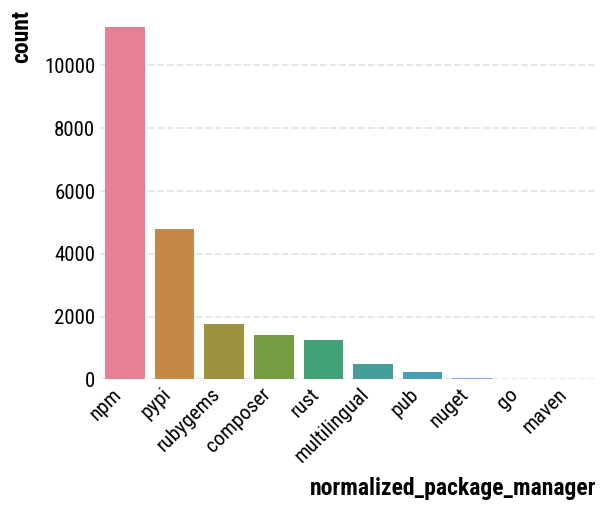

In [4]:
# Count plot of package manager
ecosystem_counts = (
    lazy_frame.unique(subset="package_uuid", keep="first")
    .select(pl.col("normalized_package_manager").value_counts(sort=True))
    .collect()
    .unnest("normalized_package_manager")
)

_ = sns.barplot(
    data=ecosystem_counts,
    x="normalized_package_manager",
    y="count",
    hue="normalized_package_manager",
)
_ = plt.xticks(rotation=45, ha="right")

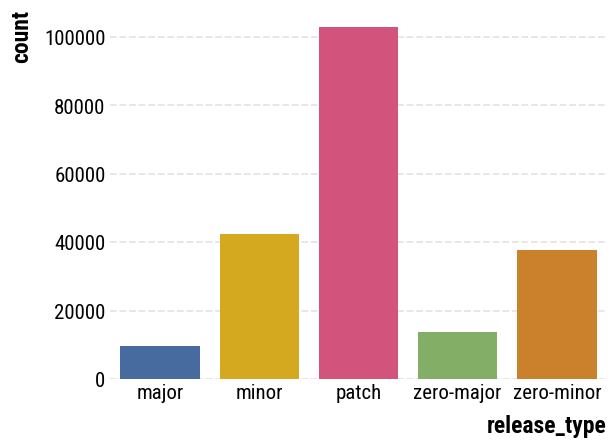

In [5]:
release_type_counts = (
    lazy_frame
    .filter(pl.col("release_type") != "unknown")
    .select(pl.col("release_type").value_counts())
    .unnest("release_type")
    .sort(by="release_type")
    .collect()
)

# Plot count of release types
_ = sns.barplot(
    data=release_type_counts,
    x="release_type",
    y="count",
    hue="release_type",
)

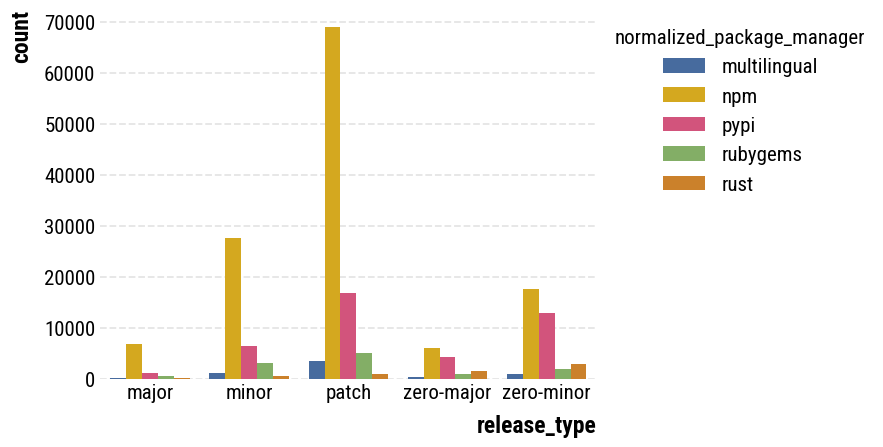

In [6]:
ecosystem_releases_counts = (
    lazy_frame.select(pl.col(["normalized_package_manager", "release_type"]))
    .filter(
        pl.col("normalized_package_manager").is_in(
            ["npm", "pypi", "multilingual", "rubygems", "rust"]
        )
    )
    .filter(pl.col("release_type") != "unknown")
    .group_by(pl.all())
    .len(name="count")
    .sort(by=["normalized_package_manager", "release_type"])
    .collect()
)

ax = sns.barplot(
    data=ecosystem_releases_counts,
    x="release_type",
    y="count",
    hue="normalized_package_manager",
)

# Move legend outside of plot
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

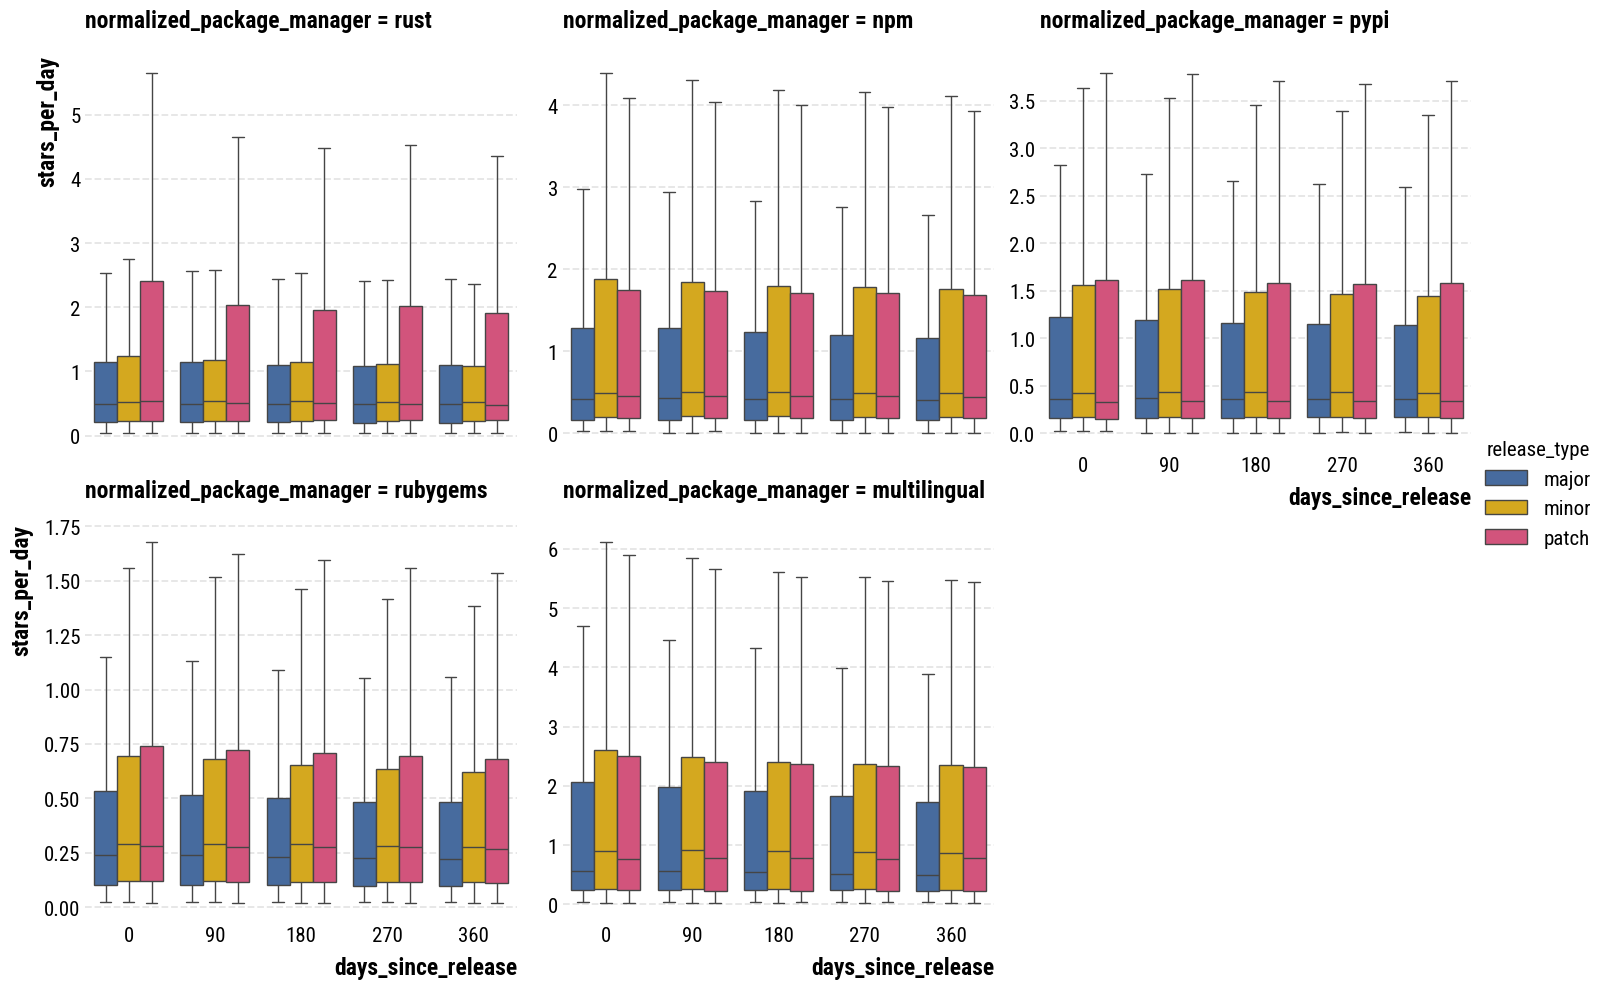

In [7]:
selected_columns = [
    col_name
    for col_name in lazy_frame.collect_schema().names()
    if "num_stars_" in col_name
]

constructed_exprs = []
for col_name in selected_columns:
    # Handle the easy case (no extra timedelta addition)
    if col_name == "num_stars_day_of_release":
        constructed_exprs.append(
            (
                pl.col(col_name)
                / (
                    pl.col("publish_date").str.to_date()
                    - pl.col("repo_created_date").str.to_date()
                ).dt.total_days()
            ).alias("stars_per_day_0_days")
        )

    # Handle timedelta additions based on col name
    else:
        # Get timedelta from column name
        timedelta_int = int(re.findall(r"\d+", col_name)[0])
        constructed_exprs.append(
            (
                pl.col(col_name)
                / (
                    (
                        pl.col("publish_date").str.to_date()
                        + timedelta(days=timedelta_int)
                    )
                    - pl.col("repo_created_date").str.to_date()
                ).dt.total_days()
            ).alias(f"stars_per_day_{timedelta_int}_days")
        )

# Create new column for "stars / day" normalized by package manager
stars_per_day_ecosystem_release_type = (
    lazy_frame.filter(
        pl.col("normalized_package_manager").is_in(
            ["npm", "pypi", "multilingual", "rubygems", "rust"]
        )
    )
    .filter(pl.col("release_type") != "unknown")
    .select(
        pl.col("normalized_package_manager"),
        pl.col("release_type")
        .str.replace("zero-major", "major")
        .str.replace("zero-minor", "minor")
        .alias("release_type"),
        *constructed_exprs,
    )
    .unpivot(
        index=["normalized_package_manager", "release_type"],
        variable_name="days_since_release",
        value_name="stars_per_day",
    )
    .select(
        pl.all().exclude("days_since_release"),
        pl.col("days_since_release")
        .str.replace(r"^(stars_per_day_)(\d+)(_days)$", r"$2")
        .cast(pl.Int16)
        .alias("days_since_release"),
    )
    .sort(by=["release_type"])
    .collect()
)

# Plot stars per day
_ = sns.catplot(
    data=stars_per_day_ecosystem_release_type,
    x="days_since_release",
    y="stars_per_day",
    hue="release_type",
    kind="box",
    col="normalized_package_manager",
    col_wrap=3,
    showfliers=False,
    sharey=False,
)

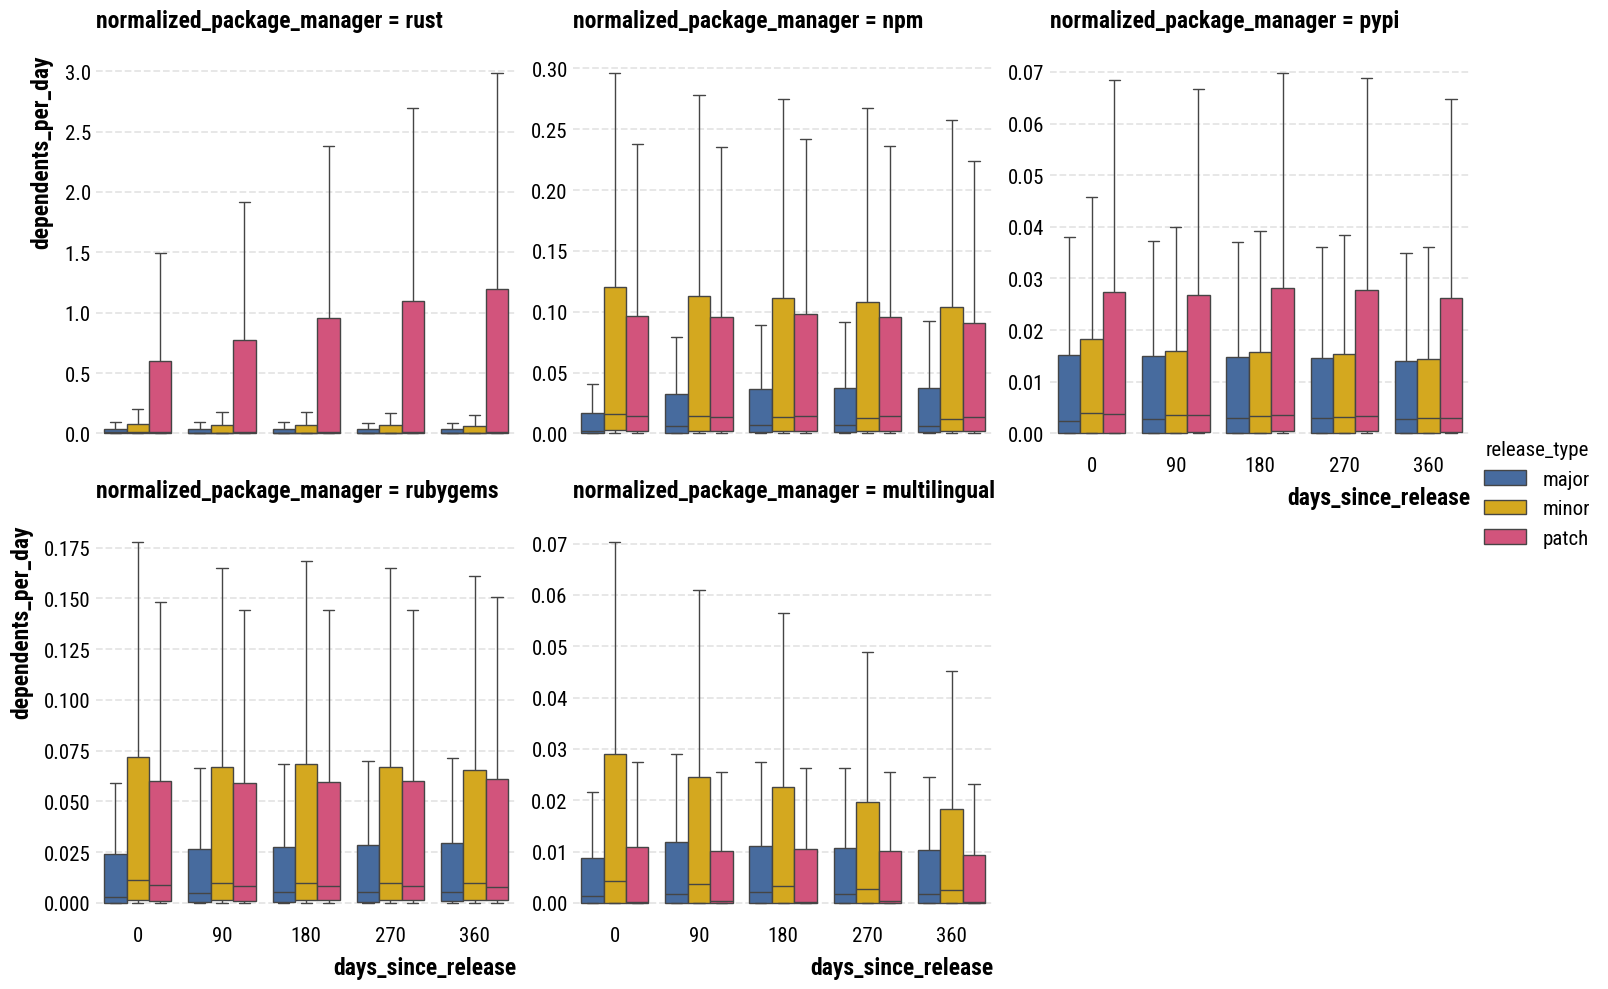

In [8]:
# Do the same thing but for num_dependents

selected_columns = [
    col_name
    for col_name in lazy_frame.collect_schema().names()
    if "num_dependents" in col_name
]

constructed_exprs = []
for col_name in selected_columns:
    # Handle the easy case (no extra timedelta addition)
    if col_name == "num_dependents_on_release_date":
        constructed_exprs.append(
            (
                pl.col(col_name)
                / (
                    pl.col("publish_date").str.to_date()
                    - pl.col("repo_created_date").str.to_date()
                ).dt.total_days()
            ).alias("dependents_per_day_0_days")
        )

    # Handle timedelta additions based on col name
    else:
        # Get timedelta from column name
        timedelta_int = int(re.findall(r"\d+", col_name)[0])
        constructed_exprs.append(
            (
                pl.col(col_name)
                / (
                    (
                        pl.col("publish_date").str.to_date()
                        + timedelta(days=timedelta_int)
                    )
                    - pl.col("repo_created_date").str.to_date()
                ).dt.total_days()
            ).alias(f"dependents_per_day_{timedelta_int}_days")
        )

# Create new column for "dependents / day" normalized by package manager
dependents_per_day_ecosystem_release_type = (
    lazy_frame.filter(
        pl.col("normalized_package_manager").is_in(
            ["npm", "pypi", "multilingual", "rubygems", "rust"]
        )
    )
    .filter(pl.col("release_type") != "unknown")
    .select(
        pl.col("normalized_package_manager"),
        pl.col("release_type")
        .str.replace("zero-major", "major")
        .str.replace("zero-minor", "minor")
        .alias("release_type"),
        *constructed_exprs,
    )
    .unpivot(
        index=["normalized_package_manager", "release_type"],
        variable_name="days_since_release",
        value_name="dependents_per_day",
    )
    .select(
        pl.all().exclude("days_since_release"),
        pl.col("days_since_release")
        .str.replace(r"^(dependents_per_day_)(\d+)(_days)$", r"$2")
        .cast(pl.Int16)
        .alias("days_since_release"),
    )
    .sort(by=["release_type"])
    .collect()
)

# Plot dependents per day
_ = sns.catplot(
    data=dependents_per_day_ecosystem_release_type,
    x="days_since_release",
    y="dependents_per_day",
    hue="release_type",
    kind="box",
    col="normalized_package_manager",
    col_wrap=3,
    showfliers=False,
    sharey=False,
)